<a href="https://colab.research.google.com/github/MuhammadFirmansyah14/histogramEquilezation/blob/main/viskom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

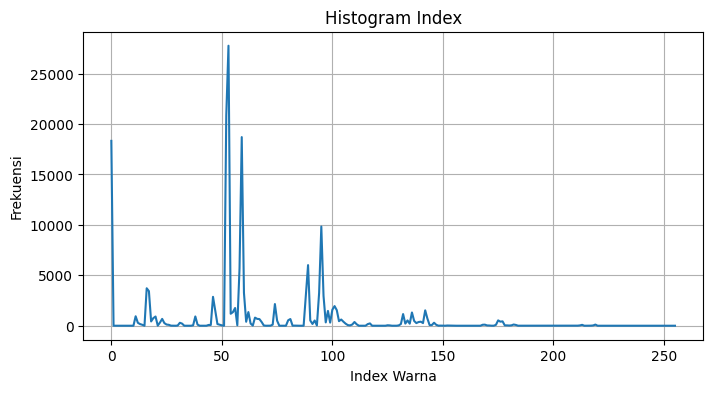

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load gambar dalam mode palet (indexed)
img = Image.open('ayam.jpg').convert('P')  # Konversi ke indexed
img_np = np.array(img)

# Hitung histogram indeks
hist, bins = np.histogram(img_np.flatten(), bins=256, range=(0,256))

# Tampilkan
plt.figure(figsize=(8,4))
plt.title("Histogram Index")
plt.xlabel("Index Warna")
plt.ylabel("Frekuensi")
plt.plot(hist)
plt.grid()
plt.show()


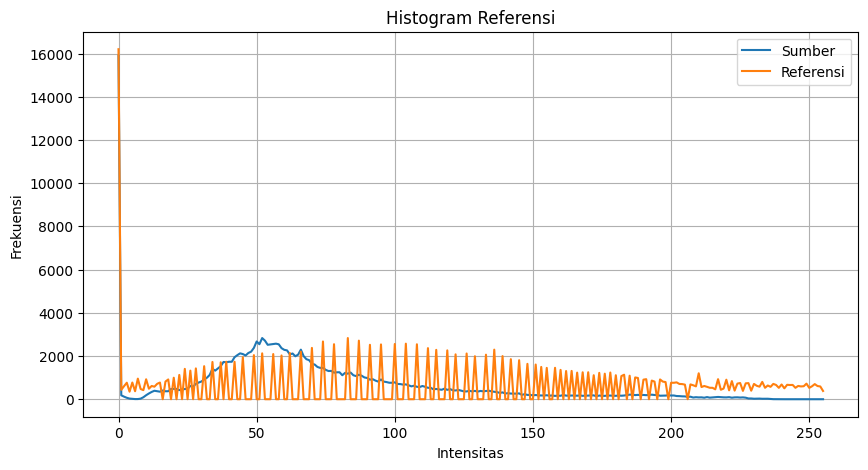

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram(img, title):
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    plt.plot(hist, label=title)
    plt.xlabel('Intensitas')
    plt.ylabel('Frekuensi')

# Load gambar sumber dan referensi (dalam grayscale)
img_src = cv2.imread(cv2.samples.findFile("ayam.jpg"), 0)
img_ref = cv2.equalizeHist(img_src)  # gunakan histogram referensi dari equalized image

# Histogram Matching manual
matched = cv2.matchTemplate(img_src, img_ref, cv2.TM_CCOEFF)

# Tampilkan histogram
plt.figure(figsize=(10,5))
plot_histogram(img_src, 'Sumber')
plot_histogram(img_ref, 'Referensi')
plt.legend()
plt.title('Histogram Referensi')
plt.grid()
plt.show()


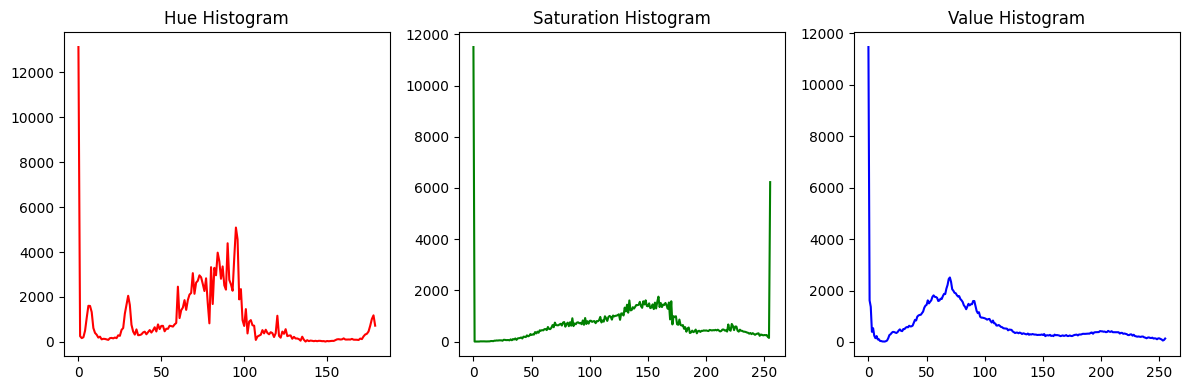

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load gambar dan ubah ke HSV
img = cv2.imread(cv2.samples.findFile("ayam.jpg"))
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Hitung histogram untuk setiap channel HSV
h_hist = cv2.calcHist([hsv_img], [0], None, [180], [0, 180])
s_hist = cv2.calcHist([hsv_img], [1], None, [256], [0, 256])
v_hist = cv2.calcHist([hsv_img], [2], None, [256], [0, 256])

# Plot
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title('Hue Histogram')
plt.plot(h_hist, color='r')
plt.subplot(1,3,2)
plt.title('Saturation Histogram')
plt.plot(s_hist, color='g')
plt.subplot(1,3,3)
plt.title('Value Histogram')
plt.plot(v_hist, color='b')
plt.tight_layout()
plt.show()


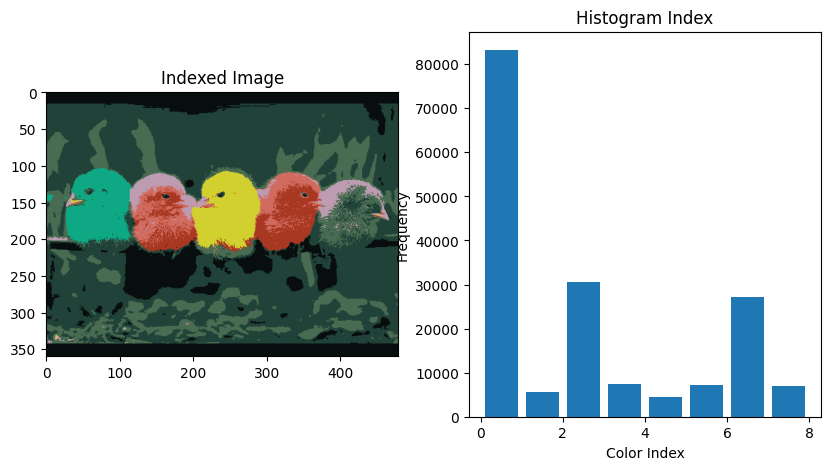

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra sebagai indexed image (dengan membatasi jumlah warna)
image = cv2.imread('ayam.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Kuantisasi warna untuk membuat citra "pseudo-indexed"
Z = image.reshape((-1,3))
Z = np.float32(Z)

# K-Means Clustering untuk mengurangi jumlah warna
K = 8
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Membuat citra hasil kuantisasi
center = np.uint8(center)
res = center[label.flatten()]
indexed_image = res.reshape((image.shape))

# Menampilkan citra dan histogram index
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(indexed_image)
plt.title("Indexed Image")

plt.subplot(1,2,2)
plt.hist(label.flatten(), bins=range(K+1), rwidth=0.8)
plt.title("Histogram Index")
plt.xlabel("Color Index")
plt.ylabel("Frequency")
plt.show()

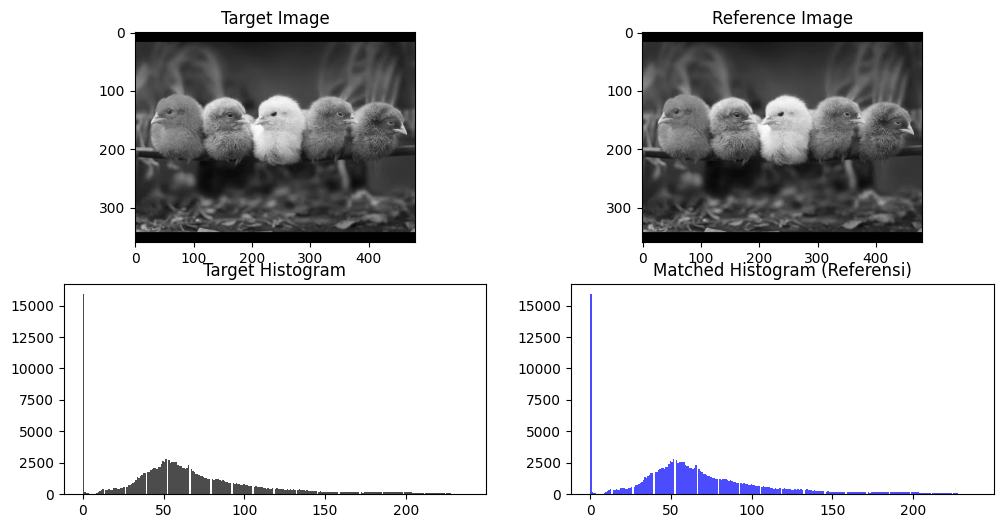

In [ ]:
from skimage import exposure
import cv2
import matplotlib.pyplot as plt

# Baca citra target dan referensi
target = cv2.imread('ayam.jpg', 0)
reference = cv2.imread('ayam.jpg', 0)

# Matching histogram
matched = exposure.match_histograms(target, reference)

# Plot histogram
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(target, cmap='gray')
plt.title("Target Image")

plt.subplot(2, 2, 2)
plt.imshow(reference, cmap='gray')
plt.title("Reference Image")

plt.subplot(2, 2, 3)
plt.hist(target.ravel(), bins=256, color='black', alpha=0.7)
plt.title("Target Histogram")

plt.subplot(2, 2, 4)
plt.hist(matched.ravel(), bins=256, color='blue', alpha=0.7)
plt.title("Matched Histogram (Referensi)")
plt.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Baca citra
image = cv2.imread('ayam.jpg')
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split channel HSV
h, s, v = cv2.split(hsv_image)

# Tampilkan citra dan histogram
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(h.ravel(), 180, [0, 180], color='r')
plt.title("Hue Histogram")

plt.subplot(1, 3, 2)
plt.hist(s.ravel(), 256, [0, 256], color='g')
plt.title("Saturation Histogram")

plt.subplot(1, 3, 3)
plt.hist(v.ravel(), 256, [0, 256], color='b')
plt.title("Value Histogram")

plt.tight_layout()
plt.show()

<ipython-input-7-3207cb2f8201>:15: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(h.ravel(), 180, [0, 180], color='r')
<ipython-input-7-3207cb2f8201>:19: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(s.ravel(), 256, [0, 256], color='g')
<ipython-input-7-3207cb2f8201>:23: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(v.ravel(), 256, [0, 256], color='b')


KeyboardInterrupt: 